# Задание

In [94]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import zipfile

In [95]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

#### Описание данных

В  ZIP-файле data.zip находится информация о студентах. Всего 10 групп студентов. Файлы в папке `Data` делятся на две категории:
* `Students_info_i` $-$ информация о студентах из группы i
* `Students_marks_i` $-$ оценки студентов из группы i за экзамены

**Одно из важных достоинств pandas $-$ это удобные методы реляционного взаимодействия с данными, аналогичные, например, возможностям SQL для слияния и конкатенации таблиц: `merge`, `join`, `concat`. Наличие готовых методов позволяет не реализовывать самостоятельно поэлементную обработку данных и оперировать сразу целыми таблицами данных.**

Подробно об этих методах посмотрите [тут](https://www.kaggle.com/residentmario/renaming-and-combining#Combining).

#### Задание 1. Соберите всю информацию о студентах в одну таблицу `df`. В получившейся таблице должна быть информация и оценки всех студентов из всех групп. Напечатайте несколько строк таблицы для демонстрации результата.

In [96]:
#your code here

# info = ["./Data/Students_info_0.csv", "./Data/Students_info_1.csv", "./Data/Students_info_2.csv", "./Data/Students_info_3.csv", "./Data/Students_info_4.csv", "./Data/Students_info_5.csv", "./Data/Students_info_6.csv", "./Data/Students_info_7.csv", "./Data/Students_info_8.csv", "./Data/Students_info_9.csv"]
# marks = ["./Data/Students_marks_0.csv", "./Data/Students_marks_1.csv", "./Data/Students_marks_2.csv", "./Data/Students_marks_3.csv", "./Data/Students_marks_4.csv", "./Data/Students_marks_5.csv", "./Data/Students_marks_6.csv", "./Data/Students_marks_7.csv", "./Data/Students_marks_8.csv", "./Data/Students_marks_9.csv"]
# df = pd.merge(pd.concat( 
#     map(pd.read_csv, info), ignore_index=False), pd.concat( 
#     map(pd.read_csv, marks), ignore_index=False))
#  #костыльно но работает...
# print(df.columns)
# print(df.head())

In [97]:
with zipfile.ZipFile('data.zip', 'r') as file:
    file.extractall()

In [98]:
info = [f'Data/Students_info_{i}.csv' for i in range(10)]
marks = [f'Data/Students_marks_{i}.csv' for i in range(10)]
info = pd.concat([pd.read_csv(file) for file in info], ignore_index=True)
marks = pd.concat([pd.read_csv(file) for file in marks], ignore_index=True)
df = pd.merge(info, marks)
df

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,1,female,group C,some college,standard,completed,group1,69,90,88
2,2,female,group B,master's degree,standard,none,group1,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,4,male,group C,some college,standard,none,group1,76,78,75
...,...,...,...,...,...,...,...,...,...,...
995,995,female,group E,master's degree,standard,completed,group10,88,99,95
996,996,male,group C,high school,free/reduced,none,group10,62,55,55
997,997,female,group C,high school,free/reduced,completed,group10,59,71,65
998,998,female,group D,some college,standard,completed,group10,68,78,77


#### Задание 2. Сделайте столбец *index* индексом у полученной таблицы. Напечатайте первые 10 строк таблицы.

In [99]:
df = df.set_index('index', drop = True)

In [100]:
#your code here
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score
index,,,,,,,,,
0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,female,group C,some college,standard,completed,group1,69,90,88
2,female,group B,master's degree,standard,none,group1,90,95,93
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,male,group C,some college,standard,none,group1,76,78,75
5,female,group B,associate's degree,standard,none,group1,71,83,78
6,female,group B,some college,standard,completed,group1,88,95,92
7,male,group B,some college,free/reduced,none,group1,40,43,39
8,male,group D,high school,free/reduced,completed,group1,64,64,67


#### Задание 3. Выведите на экран размеры полученной таблицы

In [101]:
# your code here
df.shape

(1000, 9)

#### Задание 4. Выведите на экран статистические характеристики числовых столбцов таблицы (минимум, максимум, среднее значение, стандартное отклонение)

In [102]:
# your code here
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Задание 5. Проверьте, есть ли в таблице пропущенные значения

In [103]:
# your code here
df.isna().all()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
group                          False
math score                     False
reading score                  False
writing score                  False
dtype: bool

#### Задание 6. Выведите на экран средние баллы студентов по каждому предмету (*math*, *reading*, *writing*)

In [104]:
# your code here
df['math score'].mean()

np.float64(66.089)

In [105]:
df['reading score'].mean()

np.float64(69.169)

In [106]:
df['writing score'].mean()

np.float64(68.054)

#### Задание 7. Нарисуйте три гистограммы с результатами студентов по математике, чтению и письму. Отметьте на каждом графике линией стредние баллы студентов по каждому предмету.

В идеале сделайте это тремя графиками на одной фигуре.

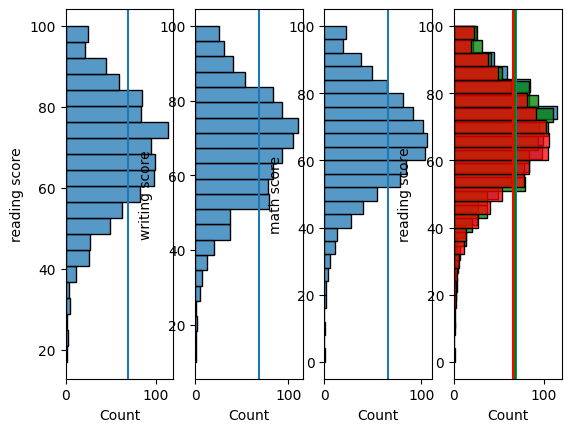

In [107]:
fig, axes = plt.subplots(1, 4)
sns.histplot(data=df, y="reading score", ax=axes[0])
axes[0].axvline(df['reading score'].mean())
sns.histplot(data=df, y="writing score", ax=axes[1])
axes[1].axvline(df['writing score'].mean())
sns.histplot(data=df, y="math score", ax=axes[2])
axes[2].axvline(df['math score'].mean())
sns.histplot(data=df, y="reading score", ax=axes[3])
axes[3].axvline(df['reading score'].mean())
sns.histplot(data=df, y="writing score", ax=axes[3], color = 'green')
axes[3].axvline(df['writing score'].mean(), color = 'green')
sns.histplot(data=df, y="math score", ax=axes[3], color = 'red')
axes[3].axvline(df['math score'].mean(), color = 'red')

plt.show()

#### Задание 8. Как зависят оценки от того, проходил ли студент курс для подготовки к сдаче экзамена (*test preparation course*)?<br>Выведите на экран для каждого предмета в отдельности средний балл студентов, проходивших курс для подготовки к экзамену и не проходивших курс.

In [108]:

average_scores = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
average_scores


,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


#### Задание 9. Реализуйте три дисплота для каждого из предметов, где разными цветами будут отмечены люди, (не)проходившие курс для подготовки к сдаче экзамена.

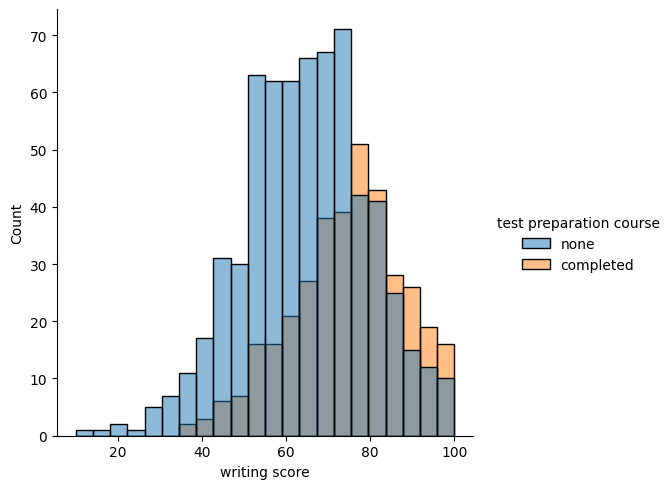

In [109]:
sns.displot(data=df, x="writing score", hue = 'test preparation course')

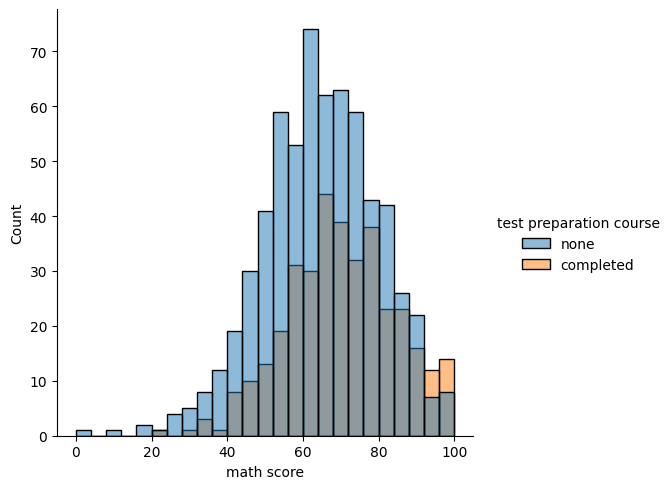

In [110]:
sns.displot(data=df, x="math score", hue = 'test preparation course')

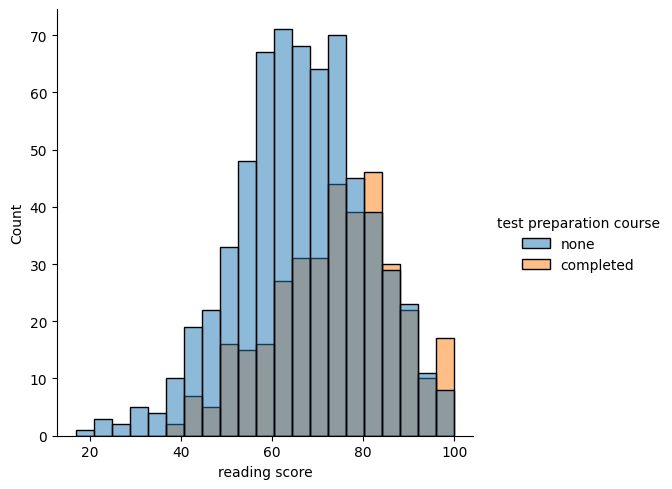

In [111]:
sns.displot(data=df, x="reading score", hue = 'test preparation course')

#### Задание 10. Выведите на экран все различные значения из столбца *lunch*.

In [112]:
# your code here
df['lunch'].unique()


array(['standard', 'free/reduced'], dtype=object)

#### Задание 11. Постройте круговую диаграму, отображающую распределение студентов в зависимости от их типа обедов и отметьте проценты каждого типа.

In [113]:
df[df['lunch'] ==  'standard']['lunch'].count()

np.int64(645)

In [114]:
data = [645, 355]

In [115]:
df[df['lunch'] ==  'free/reduced']['lunch'].count()

np.int64(355)

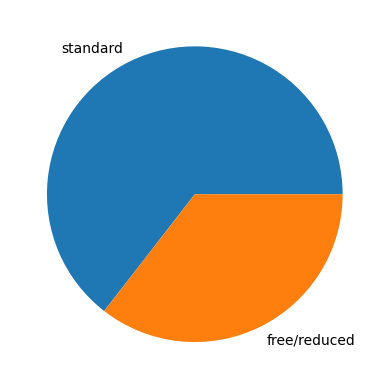

In [116]:
# your code here
plt.pie(data, labels = ['standard' ,'free/reduced'])
plt.show()

#### Задание 12. Переименуйте колонку *parental level of education* в *education*, а *test preparation course* в *test preparation*.

In [117]:
# your code here
df = df.rename(columns={"parental level of education": "education", "test preparation course": "test preparation"})

**Зафиксируем минимальный балл для сдачи экзамена**

In [118]:
passmark = 50

#### Задание 13. Ответьте на вопросы:
* Какая доля студентов сдала экзамен по математике (`passmark >= 50`)?
* Какая доля студентов, проходивших курс подготовки к экзамену, сдала экзамен по математике?
* Какая доля женщин, не проходивших курс подготовки к экзамену, не сдала экзамен по математике? 

In [119]:
# your code here
(df[df['math score'] >= 50]).count()/1000

gender              0.865
race/ethnicity      0.865
education           0.865
lunch               0.865
test preparation    0.865
group               0.865
math score          0.865
reading score       0.865
writing score       0.865
dtype: float64

In [120]:
(df[df['test preparation'] == 'completed']['math score'] >= 50).count()/1000

np.float64(0.358)

In [121]:
1 - (df[df['test preparation'] == 'completed']['math score'] >= 50).count()/1000

np.float64(0.642)

#### Задание 14. С помощью `groupby` выполните задания ниже.
* Для каждой этнической группы выведите средний балл за экзамен по чтению
* Для каждого уровня образования выведите минимальный балл за экзамен по письму

In [122]:
# your code here
eth_read = df.groupby('race/ethnicity')['reading score'].mean()
eth_read

race/ethnicity
group A    64.674157
group B    67.352632
group C    69.103448
group D    70.030534
group E    73.028571
Name: reading score, dtype: float64

In [123]:
ed_write = df.groupby('education')['writing score'].min()
ed_write

education
associate's degree    35
bachelor's degree     38
high school           15
master's degree       46
some college          19
some high school      10
Name: writing score, dtype: int64

#### Задание 15. Постройте столбчатые диграммы:
* со средними баллами  за экзамен по чтению для каждой этнической группы
* с минимальными баллами за экзамен по письму для каждого уровня образования<br>(отдельным цветом выделите тех, кто закончил только школу)

<Axes: xlabel='race/ethnicity', ylabel='reading score'>

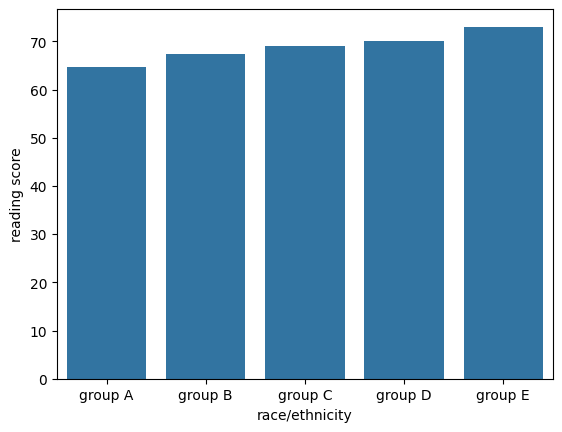

In [124]:
# your code here
sns.barplot(data = eth_read)

<Axes: xlabel='education', ylabel='writing score'>

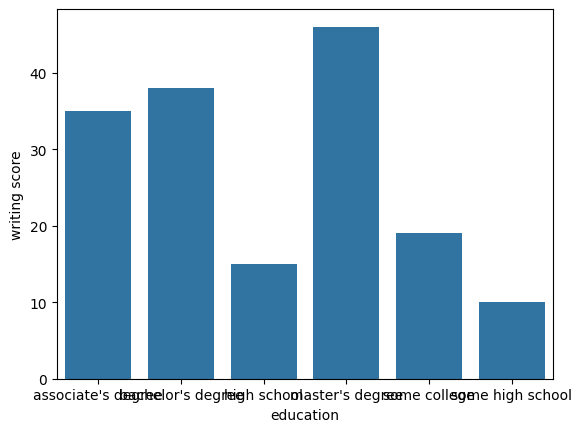

In [125]:
# your code here
sns.barplot(data = ed_write)

#### Задание 16. Выведите на экран средние баллы студентов по каждому предмету в зависимости от пола и уровня образования. То есть должно получиться количество групп, равных 2 * (число уровней образования), и для каждой такой группы выведите средний балл по каждому из предметов.

In [126]:
df

,gender,race/ethnicity,education,lunch,test preparation,group,math score,reading score,writing score
index,,,,,,,,,
0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,female,group C,some college,standard,completed,group1,69,90,88
2,female,group B,master's degree,standard,none,group1,90,95,93
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,male,group C,some college,standard,none,group1,76,78,75
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,group10,88,99,95
996,male,group C,high school,free/reduced,none,group10,62,55,55
997,female,group C,high school,free/reduced,completed,group10,59,71,65


In [127]:
grouped_data_all = df.groupby(['education', 'gender']).agg({'math score' : 'mean', 'reading score' : 'mean', 'writing score' : 'mean'})
grouped_data_all

math score  reading score  writing score
education          gender                                          
associate's degree female   65.250000      74.120690      74.000000
                   male     70.764151      67.433962      65.405660
bachelor's degree  female   68.349206      77.285714      78.380952
                   male     70.581818      68.090909      67.654545
high school        female   59.351064      68.202128      66.691489
                   male     64.705882      61.480392      58.539216
master's degree    female   66.500000      76.805556      77.638889
                   male     74.826087      73.130435      72.608696
some college       female   65.406780      73.550847      74.050847
                   male     69.009259      64.990741      63.148148
some high school   female   59.296703      69.109890      68.285714
                   male     67.840909      64.693182      61.375000

#### Задание 17. Реализуйте два хитмэпа: отдельно для женщин и мужчин, $-$ которые будут показывать средний балл по каждому из экзаменов в зависимости от образования.

<Axes: ylabel='education'>

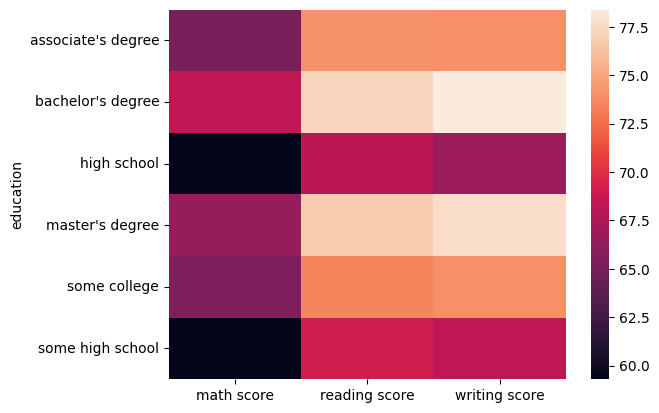

In [128]:
grouped_data_female = df[df['gender']=='female'].groupby(['education']).agg({'math score' : 'mean', 'reading score' : 'mean', 'writing score' : 'mean'})

sns.heatmap(data =grouped_data_female)


<Axes: ylabel='education'>

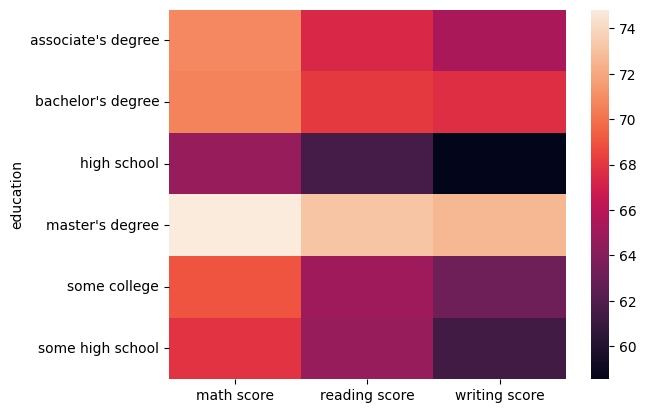

In [129]:
grouped_data_male = df[df['gender']=='male'].groupby(['education']).agg({'math score' : 'mean', 'reading score' : 'mean', 'writing score' : 'mean'})

sns.heatmap(data =grouped_data_male)


#### Задание 18. Сколько студентов успешно сдали экзамен по математике?

Создайте новый столбец в таблице `df` под названием *Math_PassStatus* и запишите в него *F*, если студент не сдал экзамен по математике (балл за экзамен `< passmark`), и *P* иначе.

Посчитайте количество студентов, сдавших и не сдавших экзамен по математике.

Сделайте аналогичные шаги для экзаменов по чтению и письму.

In [130]:
# your code here
df['Math_PassStatus'] = df['math score'].apply(lambda x: 'P' if x >= passmark else 'F')
df['Reading_PassStatus'] = df['reading score'].apply(lambda x: 'P' if x >= passmark else 'F')
df['Writing_PassStatus'] = df['writing score'].apply(lambda x: 'P' if x >= passmark else 'F')

In [131]:
df['Math_PassStatus'].value_counts()


Math_PassStatus
P    865
F    135
Name: count, dtype: int64

In [132]:
df['Reading_PassStatus'].value_counts()

Reading_PassStatus
P    910
F     90
Name: count, dtype: int64

In [133]:
df['Writing_PassStatus'].value_counts()

Writing_PassStatus
P    886
F    114
Name: count, dtype: int64

#### Задание 19. Сколько студентов успешно сдали все экзамены?

Создайте столбец *OverAll_PassStatus* и запишите в него для каждого студента *F*, если студент не сдал хотя бы один из трех экзаменов, а иначе *P*.

Посчитайте количество студентов, которые сдали все экзамены.

In [134]:
df['OverAll_PassStatus'] = df.apply(lambda row: 'P' if row['Math_PassStatus'] == 'P' and row['Reading_PassStatus'] == 'P' and row['Writing_PassStatus'] == 'P' 
                                    else 'F',axis=1)
df['OverAll_PassStatus'].value_counts()

OverAll_PassStatus
P    812
F    188
Name: count, dtype: int64

#### Задание 20. Переведем баллы в оценки

| Система перевода баллов в оценки |
|----------------------------------|
|     больше 90 = A                |
|       80-90 = B                  |
|       70-80 = C                  |
|       60-70 = D                  |
|       50-60 = E                  |
|     меньше 50 = F (Fail)         |

* Создайте вспомогательную функцию, которая будет по среднему баллу за три экзамена выставлять оценку студенту по данным выше критериям.
* Создайте столбец *Grade* и запишите в него оценку каждого студента.
* Выведите количество студентов, получивших каждую из оценок.

**В случае, если средний балл попадает на границу между оценками (т.е. равен ровно 60, 70 или 80 баллов), вы можете интерпретировать условие на своё усмотрение (т.е. можете поставить за 60 баллов оценку D, а можете - E).**

In [135]:
def get_grade(average_mark):
    if average_mark > 90:
        return 'A'
    elif 80 < average_mark <= 90:
        return 'B'
    elif 70 < average_mark <= 80:
        return 'C'
    elif 60 < average_mark <= 70:
        return 'D'
    elif 50 < average_mark <= 60:
        return 'E'
    else:
        return 'F'
df['Grade'] = df['average'].apply(get_grade)

KeyError: 'average'

In [46]:
grade = df['Grade'].value_counts()
grade

Grade
D    260
C    253
E    184
B    144
F    109
A     50
Name: count, dtype: int64

#### Задание 21. Постройте столбчатую диграмму, где будет показано распределение студентов с каждой средней оценкой, а отдельным цветом будут выделены те, кто не сдал.

C:\Users\janep\AppData\Local\Temp\ipykernel_13680\1244018041.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = grade, palette=palette)


<Axes: xlabel='Grade', ylabel='count'>

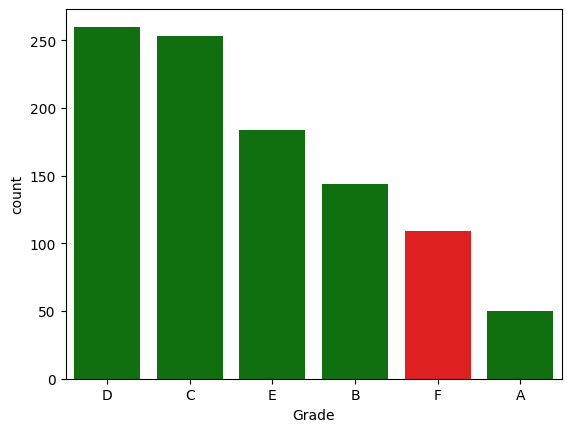

In [47]:
# your code here
palette = {}
for i in set(df['Grade']):
    if i == 'F':
        palette[i] = 'r'
    else:
        palette[i] = 'g'
sns.barplot(data = grade, palette=palette)